# TASK 2 - Unemployment analysis with python

In [1]:
# IMPORTING ALL THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = "ignore", category = FutureWarning)

In [2]:
#IMPORTING THE DATASET

unemp= pd.read_csv("Unemployment in India.csv")
unemp

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## PRELIMINARY DATA INSPECTION

In [3]:
unemp.shape

(768, 7)

In [4]:
unemp.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
unemp.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
#checking for duplicate rows

a=unemp[unemp.duplicated()]
print("Duplicate Rows:")
a

Duplicate Rows:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Dropping the duplicate rows.
unemp=unemp.drop_duplicates()
unemp.shape

In [7]:
unemp.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
#calculating % of null value in data set
unemp.isnull().mean()*100

Region                                      3.645833
 Date                                       3.645833
 Frequency                                  3.645833
 Estimated Unemployment Rate (%)            3.645833
 Estimated Employed                         3.645833
 Estimated Labour Participation Rate (%)    3.645833
Area                                        3.645833
dtype: float64

In [9]:
unemp.dropna(how= "all", inplace= True)

In [10]:
unemp.shape

(740, 7)

In [11]:
unemp["Area"].unique()

array(['Rural', 'Urban'], dtype=object)

In [12]:
unemp["Region"]. unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [13]:
unemp.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [14]:
#there is spacing issue in the column name. so renaming it and also changing Region to State
unemp.columns= ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area']
unemp.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [15]:
unemp

,State,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


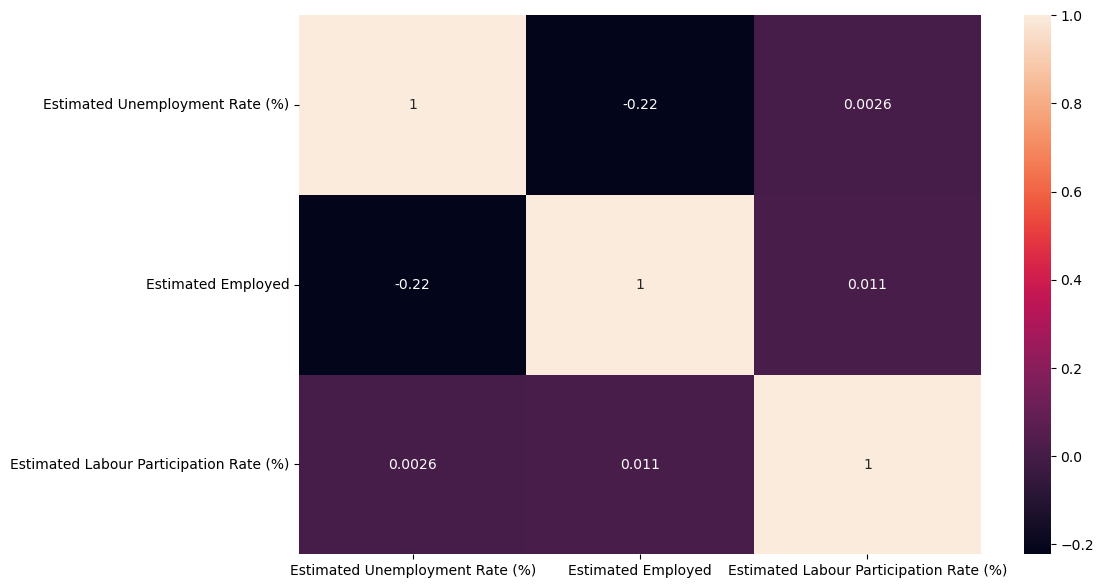

In [16]:
plt.figure(figsize=(11, 7))
sns.heatmap(unemp.corr(), annot =True)
plt.show()

In [17]:
#visualizing the unemployment rate in diffr=erent region

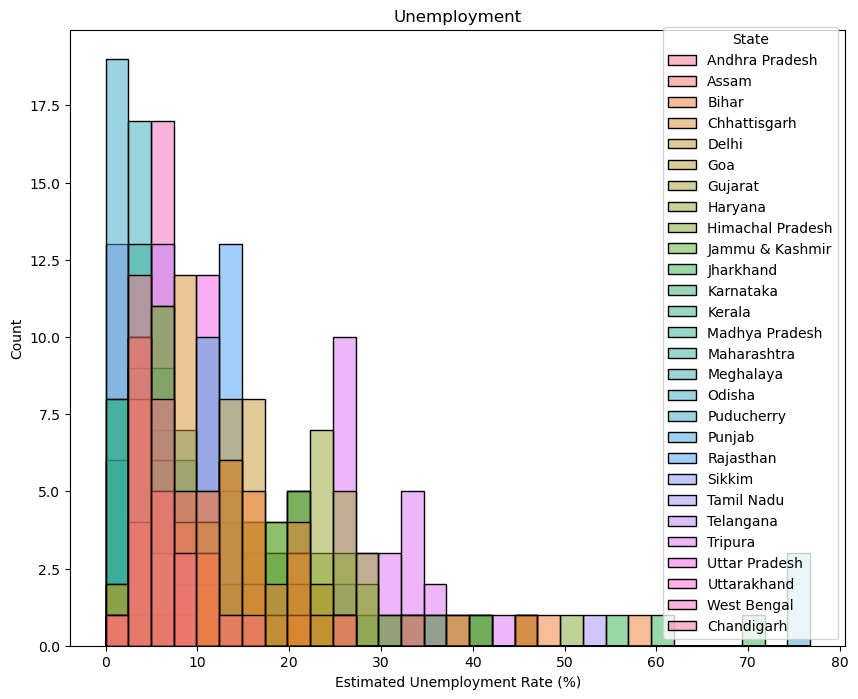

In [18]:
plt.figure(figsize=(10,8))
plt.title("Unemployment")
sns.histplot(data=unemp, x="Estimated Unemployment Rate (%)", hue="State")
plt.show()

The unemployment rate in different states can be seen from the above plot. Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force.

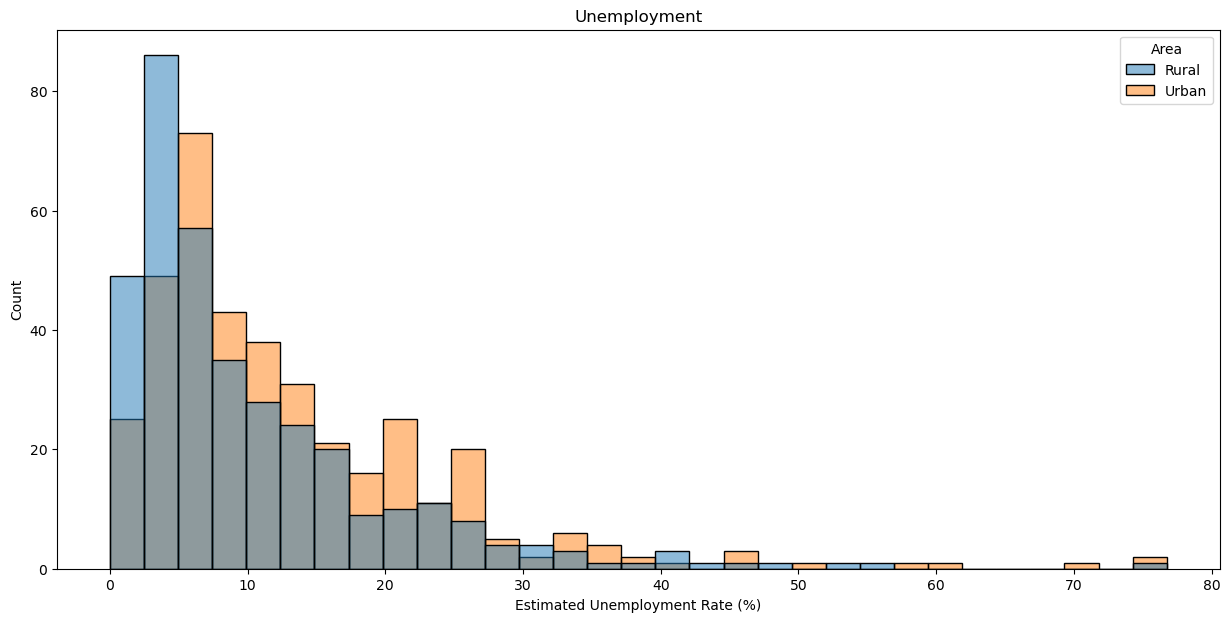

In [19]:
plt.figure(figsize=(15,7))
plt.title("Unemployment")
sns.histplot(data=unemp, x="Estimated Unemployment Rate (%)", hue="Area")
plt.show()

Based on rural and urban area we can also analysis the unemployment rate.

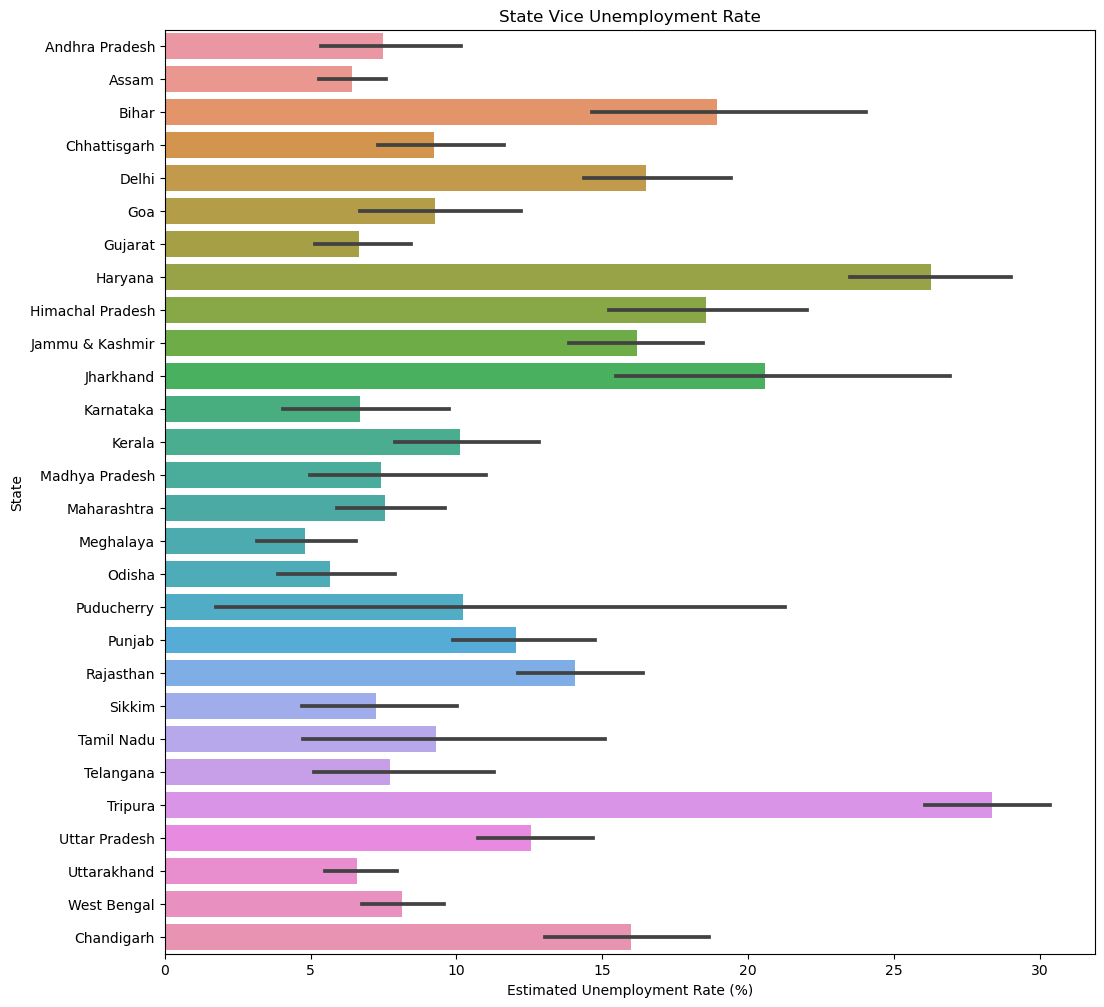

In [20]:
plt.figure(figsize=(12,12))
unemp_plt = sns.barplot(data = unemp,  x="Estimated Unemployment Rate (%)", y="State" )
unemp_plt.set(title= 'State Vice Unemployment Rate', xlabel = 'Estimated Unemployment Rate (%)', ylabel= 'State')
plt.show()


Estimated Unemployment Rate by each State

In [21]:
data = round(unemp.groupby(['State']).mean().reset_index(),2)
data

,State,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,7.48,8154093.18,39.38
1,Assam,6.43,5354772.15,44.87
2,Bihar,18.92,12366189.14,38.15
3,Chandigarh,15.99,316831.25,39.34
4,Chhattisgarh,9.24,4303498.57,42.81
5,Delhi,16.50,2627512.86,38.93
6,Goa,9.27,226308.33,39.25
7,Gujarat,6.66,11402012.79,46.10
8,Haryana,26.28,3557072.46,42.74
9,Himachal Pradesh,18.54,1059823.71,44.22
